 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [1]:
# Initial imports
import numpy as np
import pandas as pd
import datetime as dt
import seaborn as sns
from pathlib import Path
from datetime import date, datetime

%matplotlib inline
sns.set_theme(style="darkgrid")

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
whale_file = Path("./Resources/whale_returns.csv")
whale_df = pd.read_csv(whale_file, index_col="Date", infer_datetime_format=True, parse_dates=True)
whale_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [3]:
# Count nulls
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls
whale_df = whale_df.dropna()
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

In [5]:
# Review remaining statiscal data
whale_df.describe(include="all")

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
count,1059.000000,1059.000000,1059.000000,1059.000000
mean,0.000179,-0.000203,-0.000081,0.000501
std,0.007842,0.006977,0.010824,0.012831
min,-0.032711,-0.032099,-0.139820,-0.066505
25%,-0.003594,-0.003961,-0.004746,-0.005515
50%,0.000467,0.000000,0.000232,0.000617
75%,0.004292,0.003567,0.005176,0.007516
max,0.042977,0.029338,0.080705,0.061341


In [6]:
# Sort the whale dataframe for further analysis
whale_df.sort_index(inplace=True)
whale_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [7]:
# Reading algorithmic returns
algo_file = Path("./Resources/algo_returns.csv")
algo_df = pd.read_csv(algo_file, index_col="Date", infer_datetime_format=True, parse_dates=True)
algo_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [8]:
# Count nulls
algo_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [9]:
# Drop nulls
algo_df = algo_df.dropna()
algo_df.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

In [10]:
# Review remaining statiscal data
algo_df.describe(include="all")

,Algo 1,Algo 2
count,1235.000000,1235.000000
mean,0.000654,0.000341
std,0.007988,0.008466
min,-0.030951,-0.036937
25%,-0.003252,-0.003733
50%,0.000094,0.000581
75%,0.003901,0.005194
max,0.098246,0.083734


In [11]:
# Sort the algorithmic dataframe for future analysis
algo_df.sort_index(inplace=True)
algo_df.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [12]:
# Reading S&P 500 Closing Prices
sp500_file = Path("./Resources/sp500_history.csv")
sp500_df = pd.read_csv(sp500_file, index_col="Date", infer_datetime_format=True, parse_dates=True)
sp500_df.head()

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [13]:
# Check Data Types
sp500_df.dtypes

Close    object
dtype: object

In [14]:
# Fix Data Types
sp500_df["Close"] = sp500_df["Close"].str.replace("$", "").astype(float)
sp500_df.dtypes

/home/gadam/anaconda3/envs/dev/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


Close    float64
dtype: object

In [15]:
sp500_df.sort_index(inplace=True)
sp500_df.head()

,Close
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93


In [16]:
# Calculate Daily Returns
sp500_daily_returns = sp500_df.pct_change()

In [17]:
# Drop nulls
sp500_daily_returns.isnull().sum()

Close    1
dtype: int64

In [18]:
sp500_daily_returns = sp500_daily_returns.dropna()
sp500_daily_returns.isnull().sum()

Close    0
dtype: int64

In [19]:
# Rename `Close` Column to be specific to this portfolio.
sp500_daily_returns = sp500_daily_returns.rename(columns={"Close": "SP500_Close"})
sp500_daily_returns.sort_index(inplace=True)
sp500_daily_returns.head()

,SP500_Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


## Combine Whale, Algorithmic, and S&P 500 Returns

In [20]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combined_portfolio_df = pd.concat([whale_df, algo_df, sp500_daily_returns], axis="columns", join="inner")
combined_portfolio_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
Algo 1                         0
Algo 2                         0
SP500_Close                    0
dtype: int64

In [21]:
# Remove new null data for a clean dataframe
combined_portfolio_df = combined_portfolio_df.dropna()
combined_portfolio_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
Algo 1                         0
Algo 2                         0
SP500_Close                    0
dtype: int64

In [22]:
# Sort the portfolio dataframe for future analysis
combined_portfolio_df.sort_index(inplace=True)
combined_portfolio_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500_Close
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

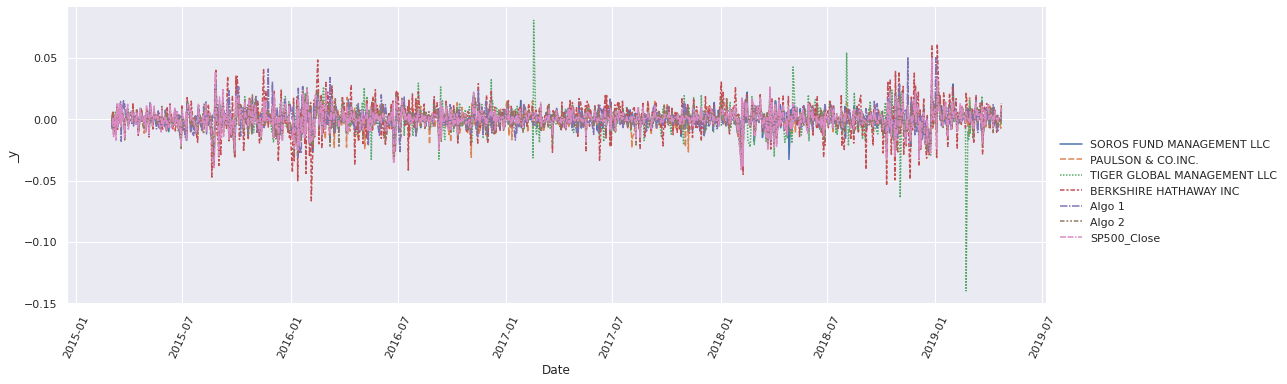

In [23]:
# Plot the combined portfolio returns dataframe
combined_chart = sns.relplot(data=combined_portfolio_df, kind="line", aspect=3.0)
combined_chart.set_xticklabels(rotation=65, horizontalalignment="center")

A visual observation of the daily returns chart indicates two stand-outs. The `TIGER GLOBAL MANAGEMENT LLC` fund has experienced significant gains and losses compared to the market and other funds.  `BERKSHIRE HATHAWAY INC` also experienced some larger gains and losses although to a lower magnitude and higher frequency to `TIGER GLOBAL MANAGEMENT LLC`.

#### Calculate and Plot cumulative returns.

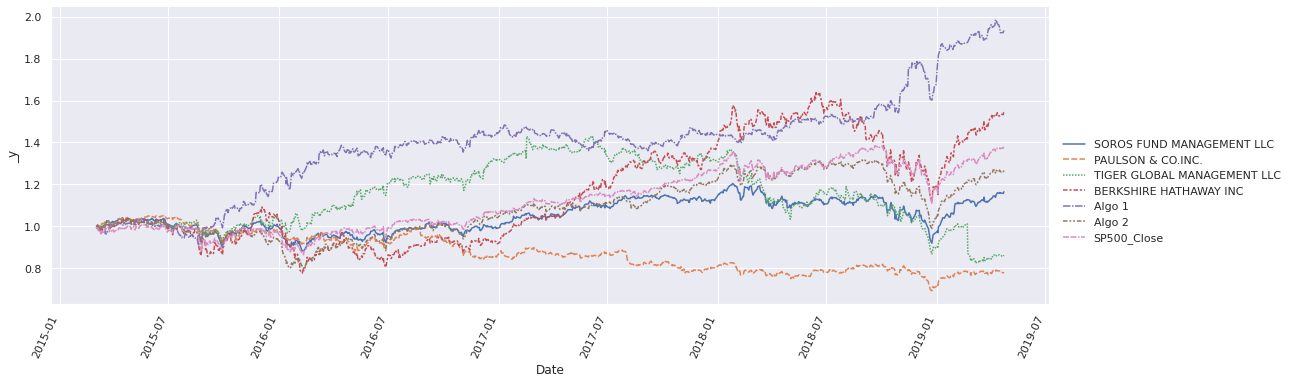

In [24]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + combined_portfolio_df).cumprod()

# Plot cumulative returns
cumulative_chart = sns.relplot(data=cumulative_returns, kind="line", aspect=3.0)
cumulative_chart.set_xticklabels(rotation=65, horizontalalignment="right")


Examining the above chart indicates that over the period analysed, `Algo 1` outperformed the rest of the funds including the market.  To a lesser extent, `BERKSHIRE HATHAWAY INC` also outperformed the market. ALthough `Algo 2` did not outperform the market, it tracked the index closely and performed better than `SOROS FUND MANAGEMENT LLC`, `TIGER GLOBAL MANAGEMENT LLC` and `PAULSON & CO.INC.`.  In fact, `PAULSON & CO.INC.` became a poor performer within the first 2 years.

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


[Text(0, 0, 'SOROS FUND MANAGEMENT LLC'),
 Text(1, 0, 'PAULSON & CO.INC. '),
 Text(2, 0, 'TIGER GLOBAL MANAGEMENT LLC'),
 Text(3, 0, 'BERKSHIRE HATHAWAY INC'),
 Text(4, 0, 'Algo 1'),
 Text(5, 0, 'Algo 2'),
 Text(6, 0, 'SP500_Close')]

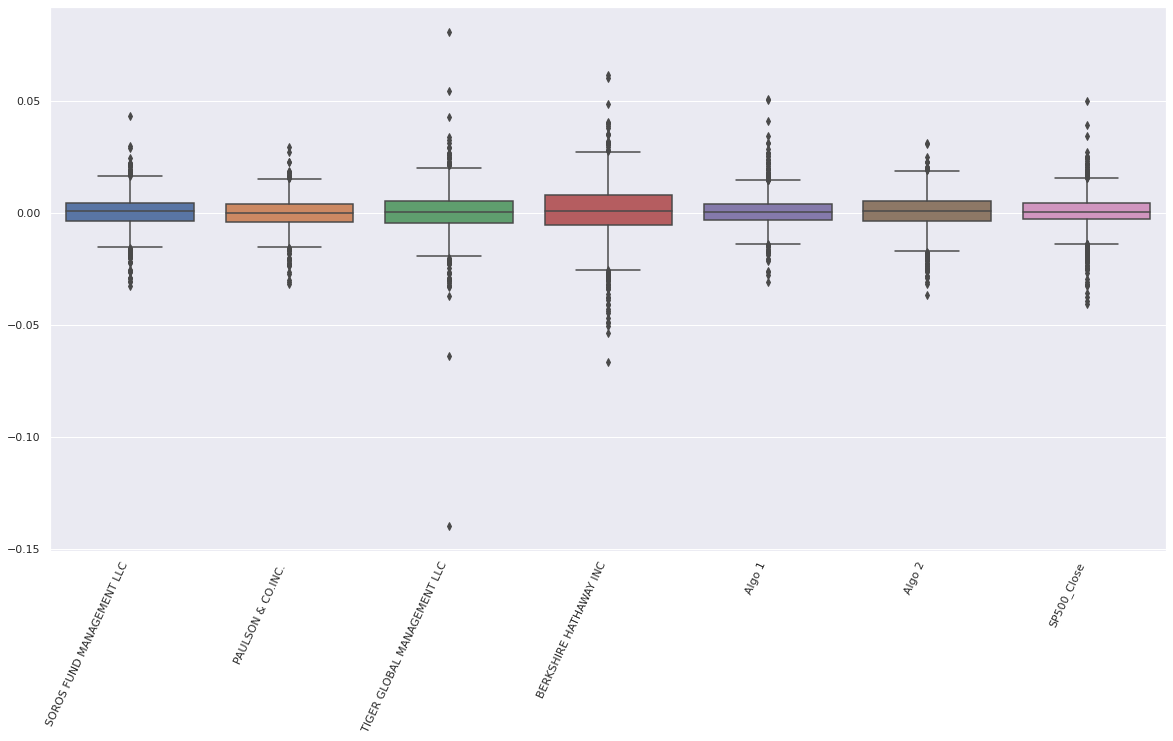

In [25]:
# Box plot to visually show risk
sns.set(rc={'figure.figsize' : (20,10)})        # Make charts bigger
combined_box_chart = sns.boxplot(data=combined_portfolio_df)
combined_box_chart.set_xticklabels(combined_box_chart.get_xticklabels(), rotation=65, horizontalalignment="right")

The box chart above that the `TIGER GLOBAL MANAGEMENT LLC` and `BERKSHIRE HATHAWAY INC` returns are significantly more dispersed than the `S&P 500` index with a wider interquartile range.  This would lead for a higher frequency of gains and losses demonstrating a higher level of volatility.

### Calculate Standard Deviations

### Determine which portfolios are riskier than the S&P 500

In [26]:
# Determine which portfolios are riskier than the S&P using the unweighted returns
combined_sd = combined_portfolio_df.std()
combined_sd

SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
Algo 2                         0.008342
SP500_Close                    0.008554
dtype: float64

In [27]:
# Loop through each stock and assess risk against the market
sp500_sd = combined_sd["SP500_Close"]
for fund, sd in combined_sd.iteritems():
    if fund == "SP500_Close":
        continue                            # Skip the `SP500_Close` key
    adverb_phrase = ""
    if sp500_sd < sd:
        adverb_phrase = "more risky than"
    elif sp500_sd > sd:
        adverb_phrase = "less risky than"
    else:
        adverb = "of similar risk to"
    print(f"With a standard deviation of {round(sd, 4)}, {fund} could be considered to be {adverb_phrase} the S&P 500 at a standard deviation of {round(sp500_sd, 4)}")

With a standard deviation of 0.0079, SOROS FUND MANAGEMENT LLC could be considered to be less risky than the S&P 500 at a standard deviation of 0.0086
With a standard deviation of 0.007, PAULSON & CO.INC.  could be considered to be less risky than the S&P 500 at a standard deviation of 0.0086
With a standard deviation of 0.0109, TIGER GLOBAL MANAGEMENT LLC could be considered to be more risky than the S&P 500 at a standard deviation of 0.0086
With a standard deviation of 0.0129, BERKSHIRE HATHAWAY INC could be considered to be more risky than the S&P 500 at a standard deviation of 0.0086
With a standard deviation of 0.0076, Algo 1 could be considered to be less risky than the S&P 500 at a standard deviation of 0.0086
With a standard deviation of 0.0083, Algo 2 could be considered to be less risky than the S&P 500 at a standard deviation of 0.0086


<AxesSubplot:>

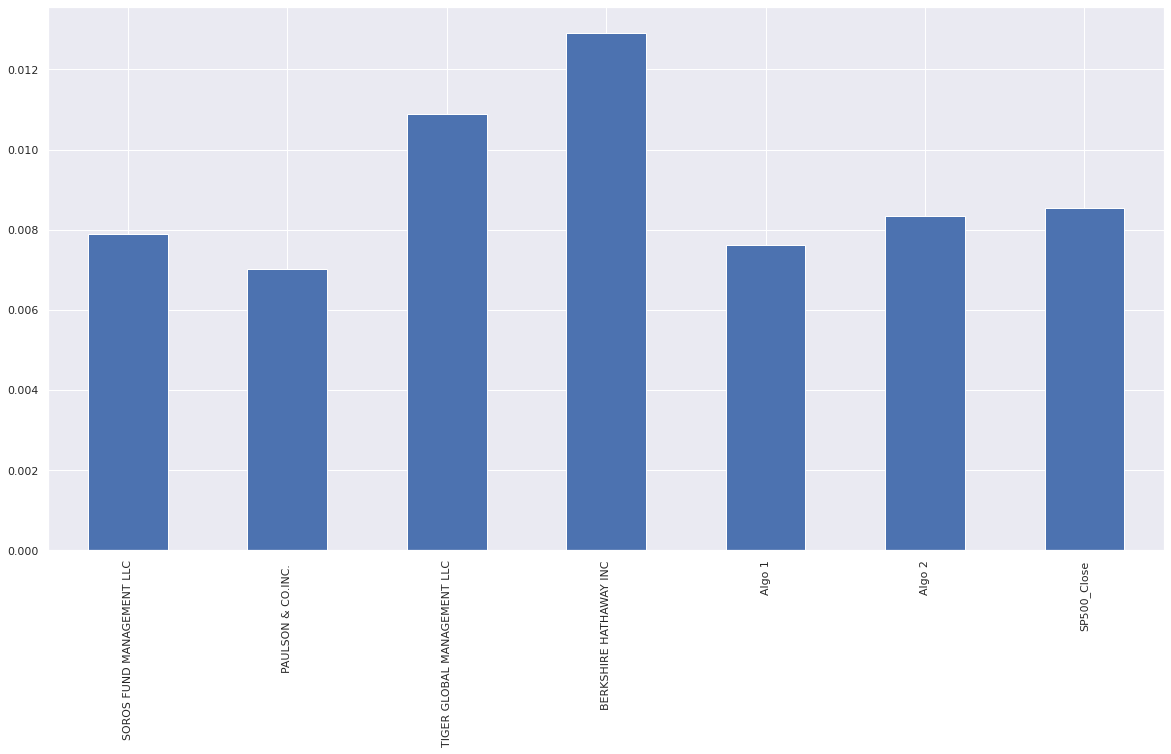

In [28]:
combined_sd.plot.bar()

The above chart confirms the conclusion made in the previous cell which found that `TIGER GLOBAL MANAGEMENT LLC` and `BERKSHIRE HATHAWAY INC` riskier than the index, illustrating the difference as more significant than `Algo 2`.

### Calculate the Annualized Standard Deviation

In [29]:
combined_volatility = combined_sd * np.sqrt(252)

<AxesSubplot:>

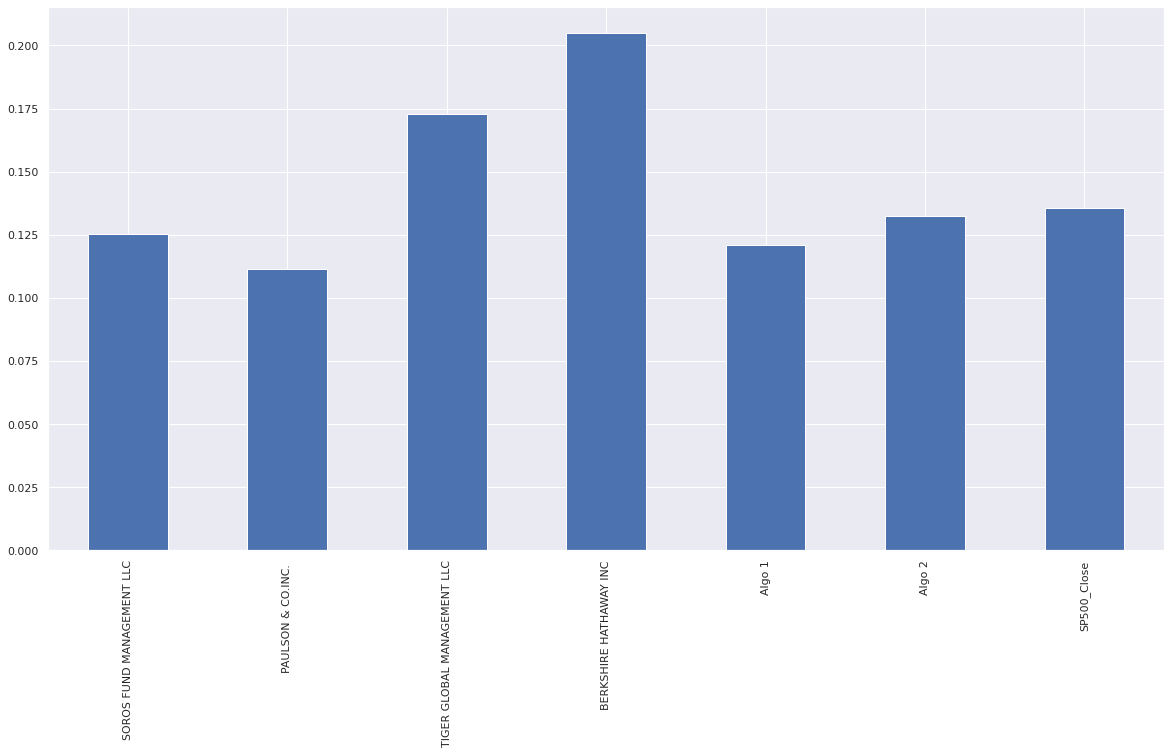

In [30]:
# Visualise all the portfolios together 
combined_volatility.plot.bar()

Visualising the volatility data together shows that the `Tiger Global Management LLC` and `Berkshire Hathaway Inc` funds as the most volatile, the `Paulson & Co. Inc` as the least whilst the `Algo 1 and 2` portfolios are close to the market

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

Text(0.5, 1.0, '21-Day Rolling Standard Deviation using unweighted returns')

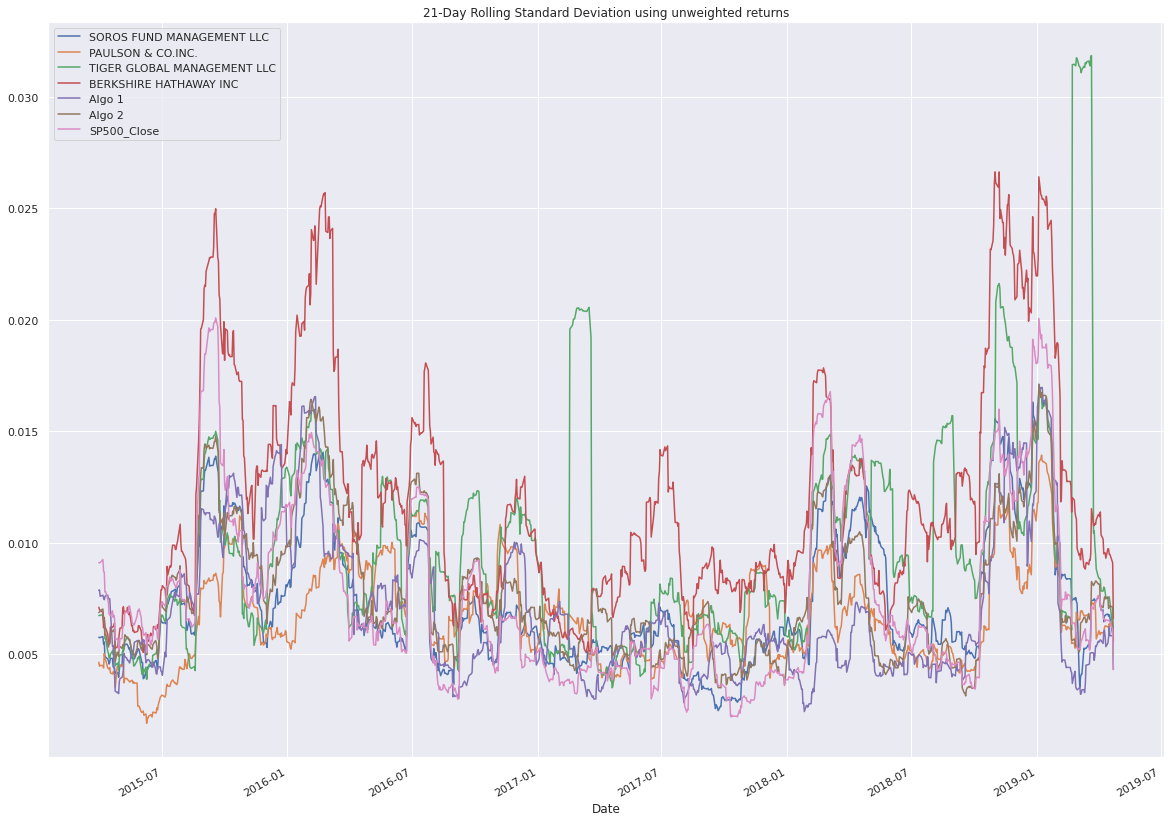

In [31]:
combined_rolling_sd = combined_portfolio_df.rolling(21).std()
combined_rolling_chart = combined_rolling_sd.plot(figsize=(20, 15))
combined_rolling_chart.set_title("21-Day Rolling Standard Deviation using unweighted returns")

The 21-day rolling standard deviation chart confirms the variability associated with both the `BERKSHIRE HATHAWAY INC` and `TIGER GLOBAL MANAGEMENT LLC` funds compared to the index and other funds.

### Calculate and plot the correlation

In [32]:
# Calculate the correlation for each portfolio and the index
correlation = combined_portfolio_df.corr()
correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500_Close
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764
SP500_Close,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000


<AxesSubplot:>

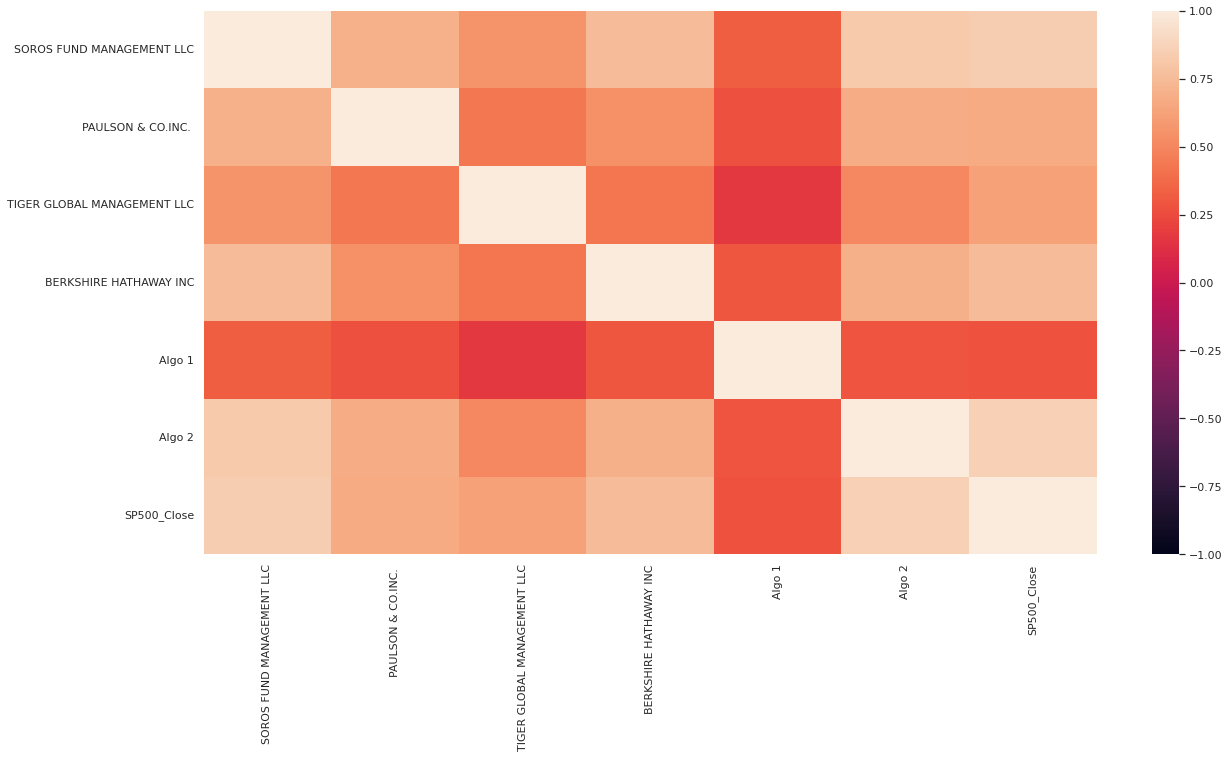

In [33]:
# Chart the correlation in a heatmap
sns.heatmap(correlation, vmin=-1, vmax=1)

The heatmap indicates that `SOROS FUND MANAGEMENT LLC` and `Algo 2` may mimic the S&P 500 index.

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

I choose the `BERKSHIRE HATHAWAY INC` portfolio for my `Beta` calculation

In [34]:
# Calculate covariance of a single portfolio
berkshire_covariance = combined_portfolio_df["BERKSHIRE HATHAWAY INC"].cov(combined_portfolio_df["SP500_Close"])
berkshire_covariance

8.302834941861669e-05

In [35]:
# Calculate variance of S&P 500
sp500_variance = combined_portfolio_df["SP500_Close"].var()
sp500_variance

7.316632424648712e-05

In [36]:
# Computing beta
berkshire_beta = berkshire_covariance / sp500_variance
berkshire_beta

1.1347891297491697

In [37]:
# Computing the correlation between 'BERKSHIRE HATHAWAY INC' and the S&P 500
berkshire_sp500 = combined_portfolio_df[["BERKSHIRE HATHAWAY INC", "SP500_Close"]]
berkshire_corr = berkshire_sp500.corr()
berkshire_corr.loc["SP500_Close" , "BERKSHIRE HATHAWAY INC"]

0.7513714937549322

<AxesSubplot:title={'center':"Rolling 60-Day Beta of 'BERKSHIRE HATHAWAY INC' returns vs S&P 500 Returns"}, xlabel='Date'>

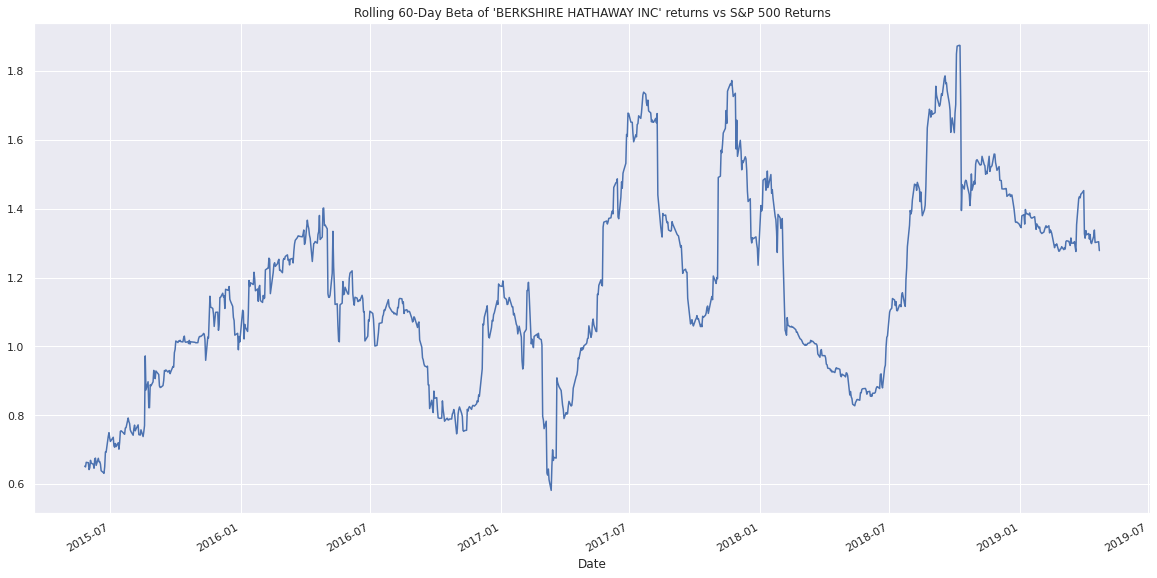

In [38]:
# Plot beta trend over a 60-day rolling window
berkshire_rolling_covariance = combined_portfolio_df["BERKSHIRE HATHAWAY INC"].rolling(window=60).cov(combined_portfolio_df["SP500_Close"])
sp500_rolling_variance = combined_portfolio_df["SP500_Close"].rolling(window=60).var()
berkshire_rolling_beta = berkshire_rolling_covariance / sp500_rolling_variance
berkshire_rolling_beta.plot(figsize=(20, 10), title="Rolling 60-Day Beta of 'BERKSHIRE HATHAWAY INC' returns vs S&P 500 Returns")

The above chart demonstrates that the `Beta` of `BERKSHIRE HATHAWAY INC` has been more volatile than the index for most of the investment period.

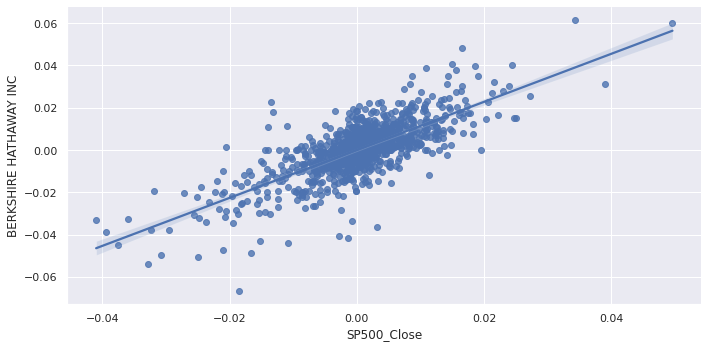

In [39]:
# Reviewing the scatter plot of 'BERKSHIRE HATHAWAY' against S&P 500
sns.lmplot(x="SP500_Close", y="BERKSHIRE HATHAWAY INC", data=combined_portfolio_df, aspect=2.0, fit_reg=True)

In [40]:
print(f"With a Beta of {round(berkshire_beta, 4)} vs a correlation of {round(berkshire_corr.loc['SP500_Close' , 'BERKSHIRE HATHAWAY INC'], 4)}, Beta does not match correlation. 'BERKSHIRE HATHAWAY INC' is approximately 75% more volatile than the index.")

With a Beta of 1.1348 vs a correlation of 0.7514, Beta does not match correlation. 'BERKSHIRE HATHAWAY INC' is approximately 75% more volatile than the index.


## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

In [41]:
combined_ewm = combined_portfolio_df.ewm(halflife="21 days", times=pd.DatetimeIndex(combined_portfolio_df)).std()
combined_ewm.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500_Close
Date,,,,,,,
2015-03-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-04,0.002472,0.005814,0.001441,0.007624,0.004700,0.002380,0.000106
2015-03-05,0.002402,0.004092,0.002878,0.005946,0.004466,0.002412,0.003689
2015-03-06,0.006921,0.004706,0.006015,0.011558,0.003111,0.009297,0.008542
2015-03-09,0.005209,0.004450,0.007513,0.008177,0.002268,0.007368,0.009512


<AxesSubplot:xlabel='Date'>

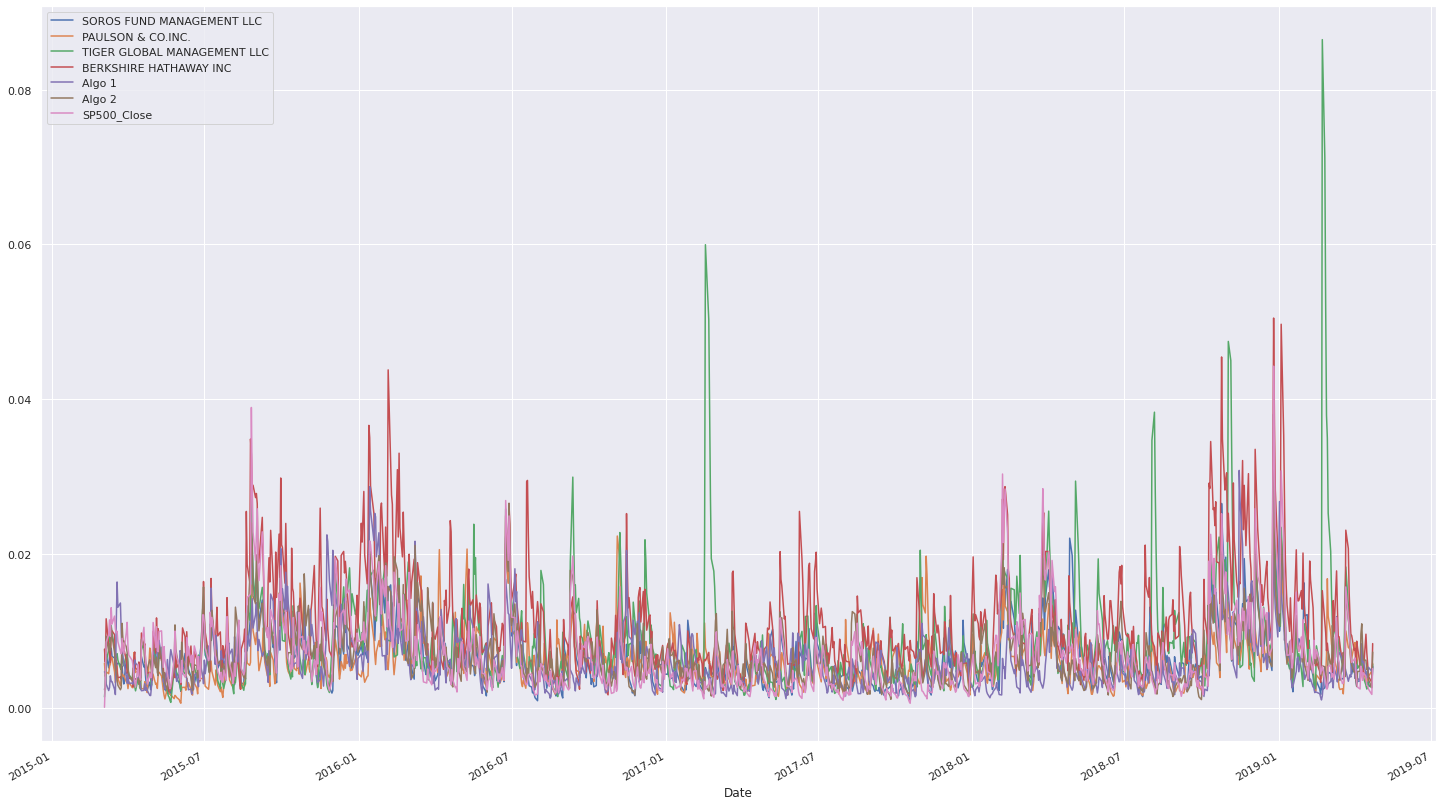

In [42]:
combined_ewm.plot(figsize=(25, 15))

The `Exponentially Weighted Average` shows that `TIGER GLOBAL MANAGEMENT LLC` and `BERKSHIRE HATHAWAY INC` consistently fluctuated to a greater extent that the index.

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [43]:
# Annualized Sharpe Ratios (using S&P500 as the risk-free rate)
sharpe_ratios = ((combined_portfolio_df.mean() - combined_portfolio_df["SP500_Close"].mean()) * 252) / (combined_portfolio_df.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC     -0.345907
PAULSON & CO.INC.             -1.273125
TIGER GLOBAL MANAGEMENT LLC   -0.630067
BERKSHIRE HATHAWAY INC         0.192576
Algo 1                         0.650964
Algo 2                        -0.163336
SP500_Close                    0.000000
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

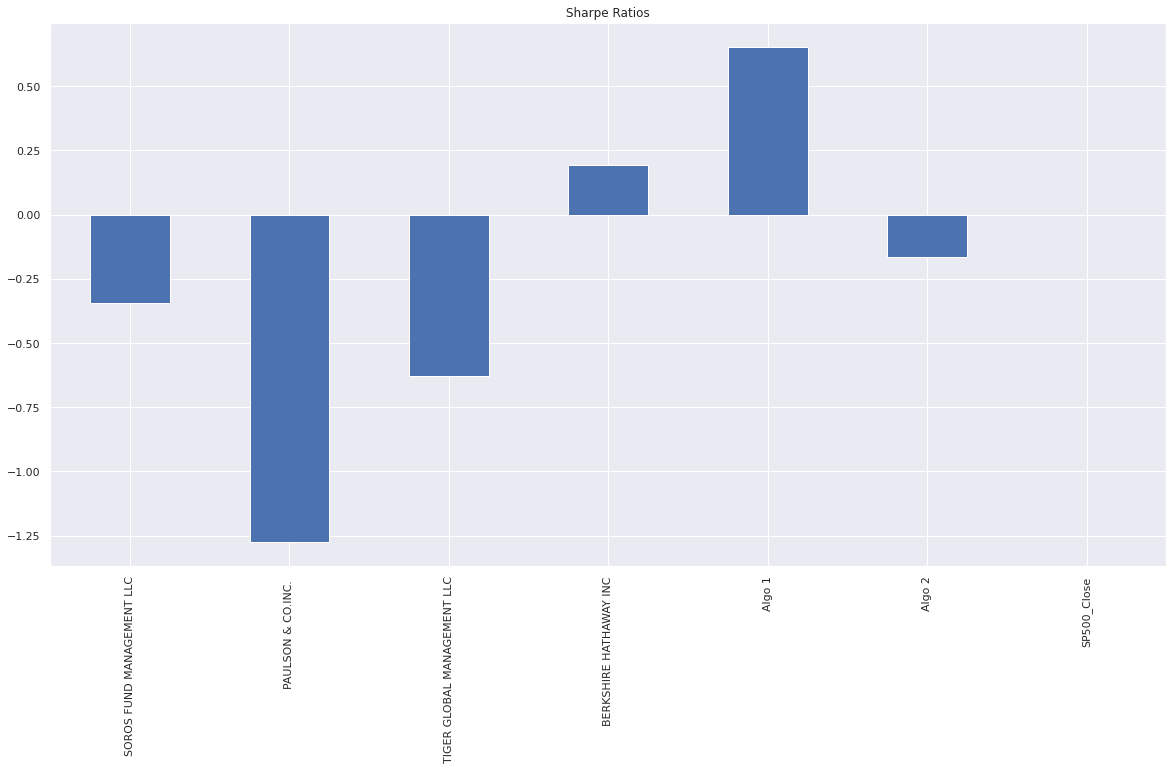

In [44]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

The chart of the `Sharpe ratios` indicates that `Algo 1` and `BERKSHIRE HATHAWAY INC` would deliver higher levels of rewards for the same unit of risk when compared to the other portfolios.

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

The only stock in the whale portfolio that achieved a positive Sharpe ratio is the `Berkshire Hathaway Inc` stock, with all the remaining stocks earning negative ratios.  In comparison, `Algo 1` achieved the best Sharpe ratio of all the stocks in both portfolios with `Algo 2` in negative territory but to a smaller extent.  On the face of it, the altorithmic strategies appear to have outperformed the whale portfolios and the market.  

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [45]:
# Get period for the combined returns
earliest_date = combined_portfolio_df.index.min().to_pydatetime()
latest_date = combined_portfolio_df.index.max().to_pydatetime()

In [46]:
earliest_date

datetime.datetime(2015, 3, 3, 0, 0)

In [47]:
latest_date

datetime.datetime(2019, 4, 23, 0, 0)

In [48]:
# Reading data from 1st stock
boeing_file = Path("./Resources/my_portfolio/boeing.csv")
boeing_df   = pd.read_csv(boeing_file)
boeing_df   = boeing_df.set_index(pd.to_datetime(boeing_df["Date"]).dt.date)  # Convert the index from timetamp to just date
boeing_df   = boeing_df.rename(columns={"Close" : "Boeing"})                  # Rename the `Close` column to the name of the stock
boeing_df   = boeing_df.drop(columns=["Date"])
boeing_df.head()


,Boeing
Date,
2015-03-03,155.57
2015-03-04,154.35
2015-03-05,154.47
2015-03-06,153.12
2015-03-09,154.75


In [49]:
# Reading data from 2nd stock
eli_file = Path("./Resources/my_portfolio/eli_lilly.csv")
eli_df   = pd.read_csv(eli_file)
eli_df   = eli_df.set_index(pd.to_datetime(eli_df["Date"]).dt.date)  # Convert the index from timetamp to just date
eli_df   = eli_df.rename(columns={"Close" : "Eli Lilly"})            # Rename the `Close` column to the name of the stock
eli_df   = eli_df.drop(columns=["Date"])
eli_df.head()

,Eli Lilly
Date,
2015-03-03,70.37
2015-03-04,70.65
2015-03-05,70.59
2015-03-06,68.41
2015-03-09,69.58


In [50]:
# Reading data from 3rd stock
hal_file = Path("./Resources/my_portfolio/haliburton.csv")
hal_df   = pd.read_csv(hal_file)
hal_df   = hal_df.set_index(pd.to_datetime(hal_df["Date"]).dt.date)  # Convert the index from timetamp to just date
hal_df   = hal_df.rename(columns={"Close" : "Haliburton"})           # Rename the `Close` column to the name of the stock
hal_df   = hal_df.drop(columns=["Date"])
hal_df.head()

,Haliburton
Date,
2015-03-03,43.11
2015-03-04,43.07
2015-03-05,42.94
2015-03-06,42.38
2015-03-09,42.04


In [51]:
# Reading data from the 4th stock
sbc_file = Path("./Resources/my_portfolio/sbc.csv")
sbc_df   = pd.read_csv(sbc_file)
sbc_df   = sbc_df.set_index(pd.to_datetime(sbc_df["Date"]).dt.date)   # Convert the index from timestamp to just date
sbc_df   = sbc_df.rename(columns={"Close" : "SBC"})                # Rename the `Close` column to the name of the stock
sbc_df   = sbc_df.drop(columns=["Date"])
sbc_df.head()

,SBC
Date,
2015-03-03,8.90
2015-03-04,8.76
2015-03-05,8.78
2015-03-06,8.73
2015-03-09,8.73


In [52]:
# Combine all stocks in a single DataFrame
my_portfolio_df = pd.concat([boeing_df, eli_df, hal_df, sbc_df], axis="columns", join="inner")
my_portfolio_df.head()

,Boeing,Eli Lilly,Haliburton,SBC
Date,,,,
2015-03-03,155.57,70.37,43.11,8.90
2015-03-04,154.35,70.65,43.07,8.76
2015-03-05,154.47,70.59,42.94,8.78
2015-03-06,153.12,68.41,42.38,8.73
2015-03-09,154.75,69.58,42.04,8.73


In [53]:
# Reset Date index
## Already done as I created the data frames but I will sort it instead
my_portfolio_df.sort_index(inplace=True)
my_portfolio_df.head()

,Boeing,Eli Lilly,Haliburton,SBC
Date,,,,
2015-03-03,155.57,70.37,43.11,8.90
2015-03-04,154.35,70.65,43.07,8.76
2015-03-05,154.47,70.59,42.94,8.78
2015-03-06,153.12,68.41,42.38,8.73
2015-03-09,154.75,69.58,42.04,8.73


In [54]:
# Reorganize portfolio data by having a column per symbol
## Already done as I created the dataframes

In [55]:
# Calculate daily returns
my_portfolio_returns = my_portfolio_df.pct_change()
my_portfolio_returns.head()

,Boeing,Eli Lilly,Haliburton,SBC
Date,,,,
2015-03-03,NaN,NaN,NaN,NaN
2015-03-04,-0.007842,0.003979,-0.000928,-0.015730
2015-03-05,0.000777,-0.000849,-0.003018,0.002283
2015-03-06,-0.008740,-0.030883,-0.013041,-0.005695
2015-03-09,0.010645,0.017103,-0.008023,0.000000


In [56]:
# Drop NAs
my_portfolio_returns = my_portfolio_returns.dropna()
# Display sample data
my_portfolio_returns.head(20)

,Boeing,Eli Lilly,Haliburton,SBC
Date,,,,
2015-03-04,-0.007842,0.003979,-0.000928,-0.015730
2015-03-05,0.000777,-0.000849,-0.003018,0.002283
2015-03-06,-0.008740,-0.030883,-0.013041,-0.005695
2015-03-09,0.010645,0.017103,-0.008023,0.000000
2015-03-10,-0.015057,-0.011498,-0.017364,-0.033219
2015-03-11,-0.008201,-0.004653,0.000000,0.010664
2015-03-12,0.005755,0.016068,-0.007746,0.021102
2015-03-13,-0.003091,0.004744,-0.019761,-0.020666
2015-03-16,0.013855,0.016884,0.008462,0.004689


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [57]:
# Set weights
# Since I have 4 stocks, I'll use 25% weightings
weights = [1/4, 1/4, 1/4, 1/4]

In [58]:
# Calculate portfolio return
my_portfolio_weighted_returns = my_portfolio_returns.dot(weights)

# Display sample data
my_portfolio_weighted_returns.head(10)

Date
2015-03-04   -0.005130
2015-03-05   -0.000202
2015-03-06   -0.014590
2015-03-09    0.004931
2015-03-10   -0.019284
2015-03-11   -0.000548
2015-03-12    0.008795
2015-03-13   -0.009694
2015-03-16    0.010972
2015-03-17   -0.001215
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [59]:
# Join your returns DataFrame to the original returns DataFrame
all_returns = pd.concat([my_portfolio_weighted_returns, combined_portfolio_df], axis="columns", join="inner")
all_returns.head(20)

/home/gadam/anaconda3/envs/dev/lib/python3.7/site-packages/pandas/core/indexes/base.py:334: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  joined_ndarray, lidx, ridx = libjoin.inner_join_indexer(sv, ov)
/home/gadam/anaconda3/envs/dev/lib/python3.7/site-packages/pandas/core/dtypes/missing.py:484: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  ensure_object(left.ravel()), ensure_object(right.ravel())


,0,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500_Close
Date,,,,,,,,
2015-03-04 00:00:00,-0.005130,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05 00:00:00,-0.000202,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06 00:00:00,-0.014590,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09 00:00:00,0.004931,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944
2015-03-10 00:00:00,-0.019284,-0.010263,-0.005341,-0.012079,-0.009739,-0.001392,-0.012155,-0.016961
2015-03-11 00:00:00,-0.000548,0.004012,0.005163,0.003312,-0.001147,0.002994,0.000605,-0.001918
2015-03-12 00:00:00,0.008795,0.008265,0.010272,0.013117,0.010801,-0.002935,0.011667,0.012601
2015-03-13 00:00:00,-0.009694,-0.002497,-0.001428,-0.003697,-0.008142,-0.005423,-0.005062,-0.006075
2015-03-16 00:00:00,0.010972,0.007901,0.003583,0.007953,0.008055,-0.003395,0.004117,0.013534


**Note** I am not certain what caused the warning message above but my guess is that one of the date indexes must be stored as a timestamp

In [60]:
all_returns = all_returns.rename(columns={0 : "My_Portfolio"})
all_returns.head()

,My_Portfolio,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500_Close
Date,,,,,,,,
2015-03-04 00:00:00,-0.005130,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05 00:00:00,-0.000202,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06 00:00:00,-0.014590,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09 00:00:00,0.004931,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944
2015-03-10 00:00:00,-0.019284,-0.010263,-0.005341,-0.012079,-0.009739,-0.001392,-0.012155,-0.016961


In [61]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
all_returns.isna().sum()

My_Portfolio                   0
SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
Algo 1                         0
Algo 2                         0
SP500_Close                    0
dtype: int64

## Re-run the risk analysis with your portfolio to see how it compares to the others

Calculating the standard deviation

In [62]:
all_returns_sd = all_returns.std()
all_returns_sd

My_Portfolio                   0.011215
SOROS FUND MANAGEMENT LLC      0.007869
PAULSON & CO.INC.              0.006974
TIGER GLOBAL MANAGEMENT LLC    0.010934
BERKSHIRE HATHAWAY INC         0.012862
Algo 1                         0.007631
Algo 2                         0.008346
SP500_Close                    0.008500
dtype: float64

### Calculate the Annualized Standard Deviation

In [63]:
# Calculate the annualized `std`
all_returns_annualised_std = all_returns.std() * np.sqrt(252)
all_returns_annualised_std.head(20)

My_Portfolio                   0.178036
SOROS FUND MANAGEMENT LLC      0.124918
PAULSON & CO.INC.              0.110712
TIGER GLOBAL MANAGEMENT LLC    0.173569
BERKSHIRE HATHAWAY INC         0.204182
Algo 1                         0.121131
Algo 2                         0.132497
SP500_Close                    0.134941
dtype: float64

<AxesSubplot:>

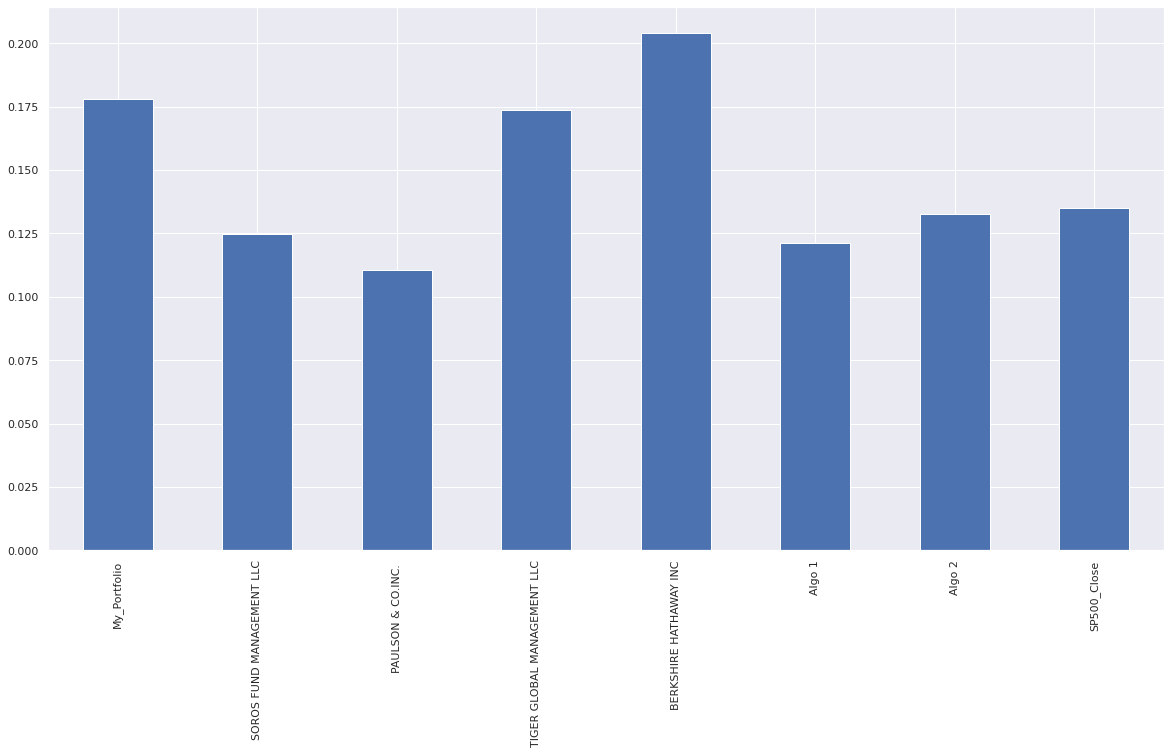

In [64]:
all_returns_annualised_std.plot.bar()

The bar chart above shows that my portfolio is more volatile that than the `altorithmic` portfolio and the `S&P 500` index however likely similar to the `whale` portfolio.

### Calculate and plot rolling `std` with 21-day window

Text(0.5, 1.0, '21-Day Rolling Standard Deviation for my portfolio combined with Whale and Algorithmic strategy portfolios and the S&P 500 Index')

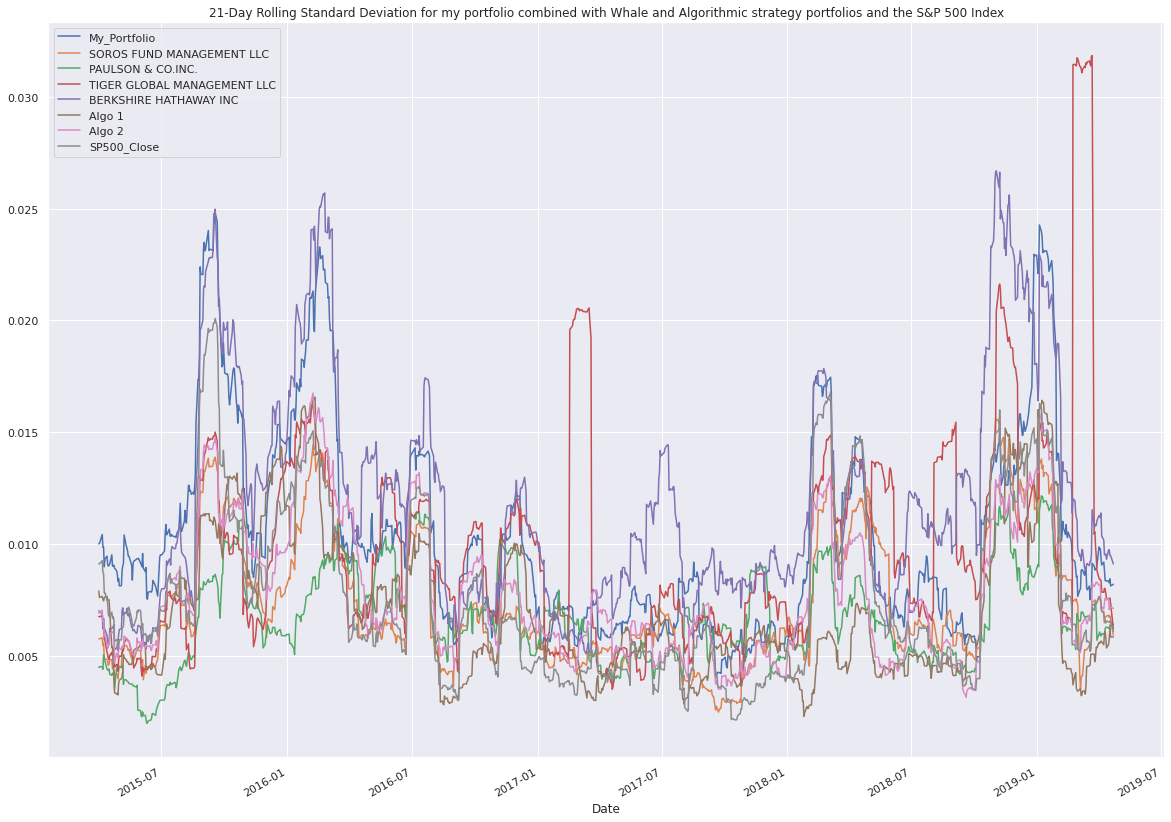

In [65]:
# Calculate rolling standard deviation
all_returns_rolling_sd = all_returns.rolling(21).std()

# Plot rolling standard deviation
all_returns_rolling_chart = all_returns_rolling_sd.plot(figsize=(20, 15))
all_returns_rolling_chart.set_title("21-Day Rolling Standard Deviation for my portfolio combined with Whale and Algorithmic strategy portfolios and the S&P 500 Index")


The 21-day rolling window shows a significant degree of volatility in the stocks that I have chosen similar to the `whale` portfolio.

### Calculate and plot the correlation

<AxesSubplot:>

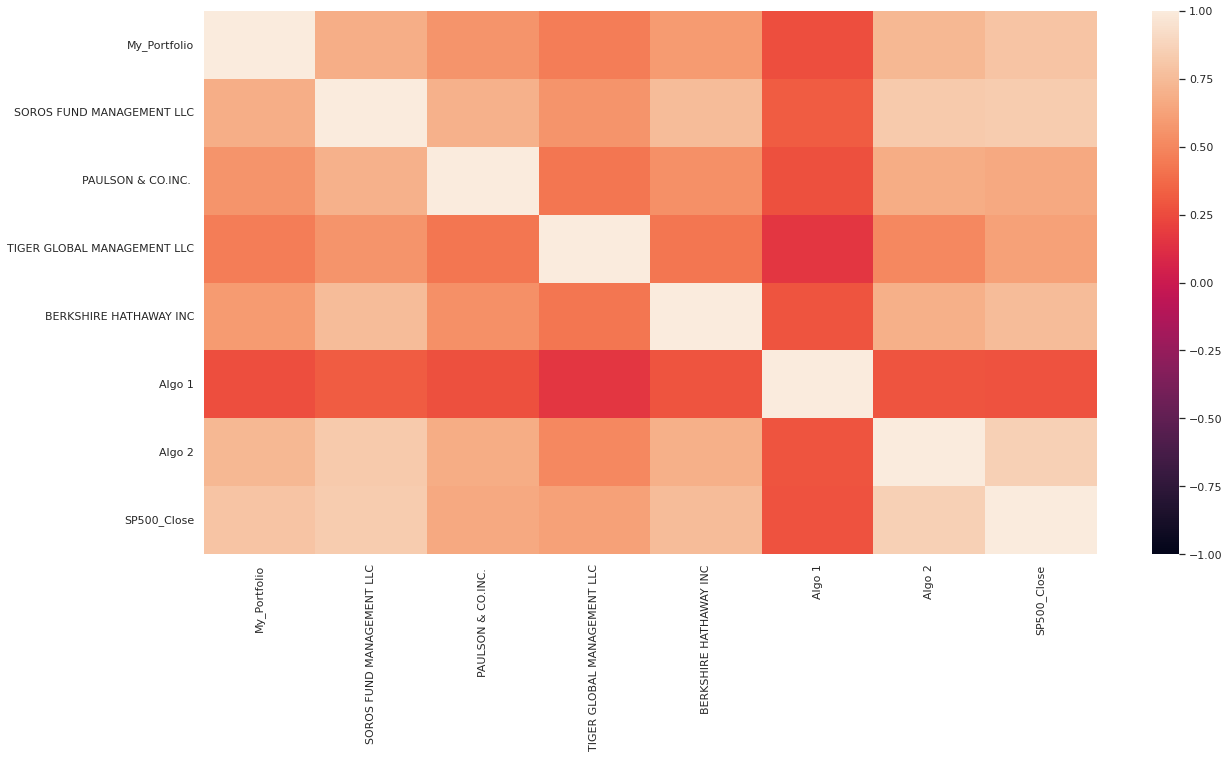

In [66]:
# Calculate and plot the correlation
all_returns_correlation = all_returns.corr()
# Chart the correlation in a heatmap
sns.heatmap(all_returns_correlation, vmin=-1, vmax=1)

My portfolio shows a moderately strong correlation to and may mimic the `S&P 500`.

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

<AxesSubplot:title={'center':"Rolling 60-Day Beta of my portfolio's returns vs S&P 500 Returns"}, xlabel='Date'>

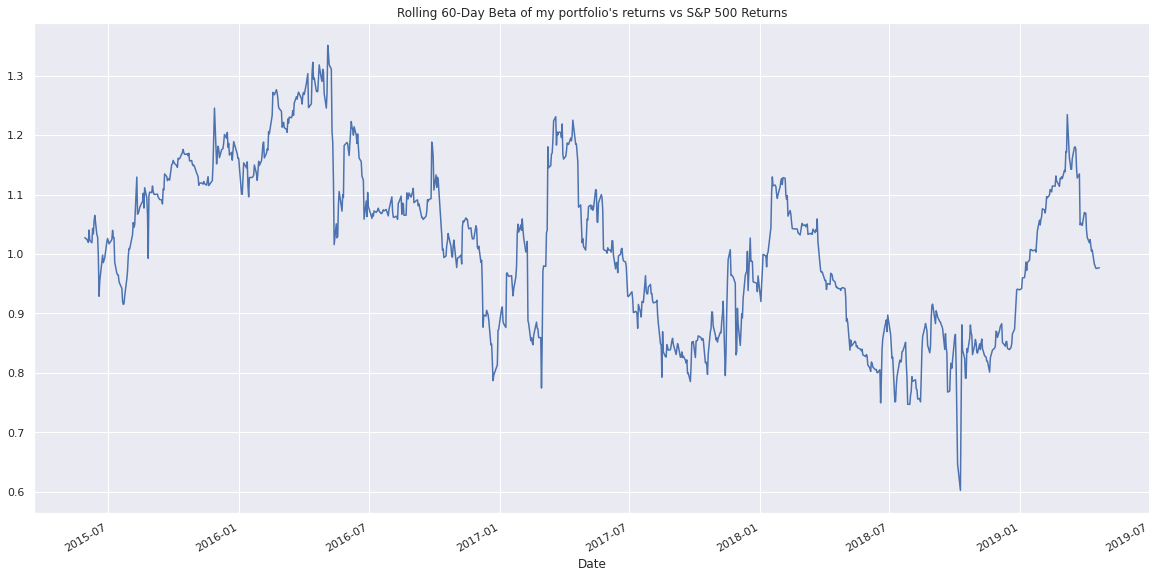

In [67]:
# Calculate and plot Beta
my_portfolio_rolling_covariance = all_returns["My_Portfolio"].rolling(window=60).cov(all_returns["SP500_Close"])
sp500_rolling_variance = all_returns["SP500_Close"].rolling(window=60).var()
my_portfolio_rolling_beta = my_portfolio_rolling_covariance / sp500_rolling_variance
my_portfolio_rolling_beta.plot(figsize=(20, 10), title="Rolling 60-Day Beta of my portfolio's returns vs S&P 500 Returns")

My portfolio is definitely more volatile that the `S&P 500` index.

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [68]:
# Calculate Annualized Sharpe Ratios
all_returns_sharpe_ratios = ((all_returns.mean() - all_returns["SP500_Close"].mean()) * 252) / (all_returns.std() * np.sqrt(252))
all_returns_sharpe_ratios

My_Portfolio                   0.183799
SOROS FUND MANAGEMENT LLC     -0.324830
PAULSON & CO.INC.             -1.230357
TIGER GLOBAL MANAGEMENT LLC   -0.588575
BERKSHIRE HATHAWAY INC        -0.015819
Algo 1                         0.830594
Algo 2                        -0.105404
SP500_Close                    0.000000
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios including my portfolio'}>

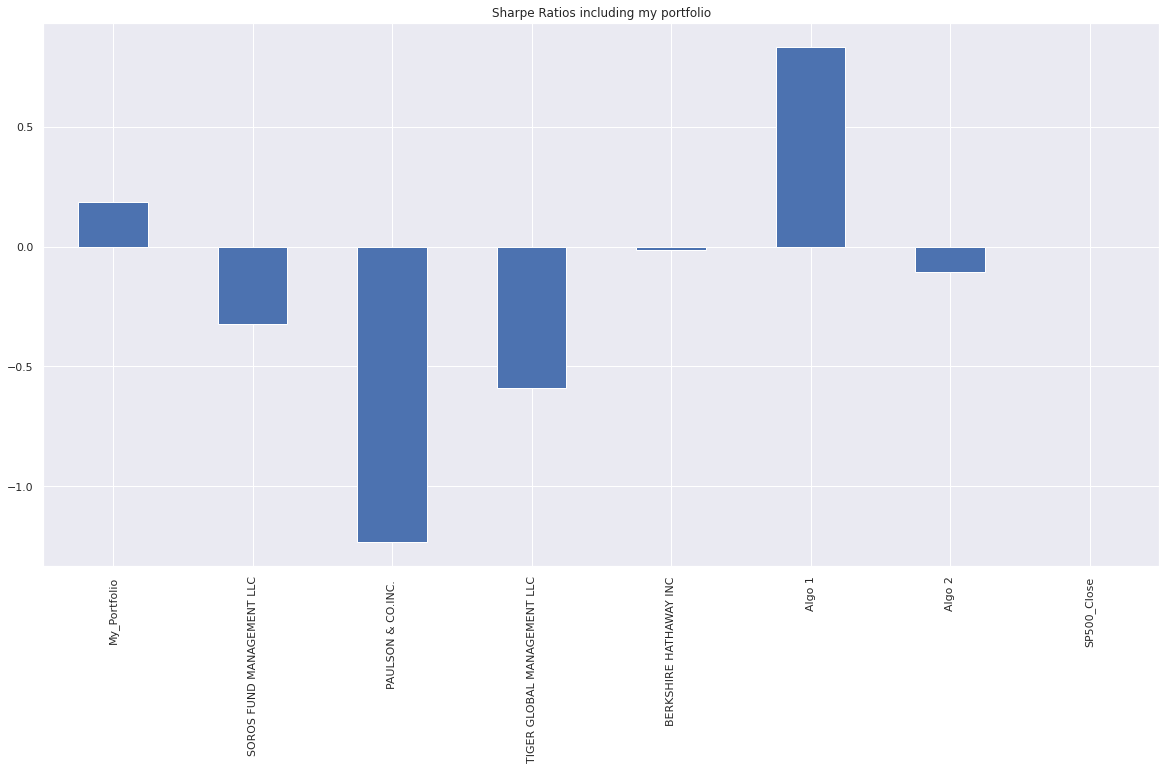

In [69]:
# Visualize the sharpe ratios as a bar plot
all_returns_sharpe_ratios.plot(kind="bar", title="Sharpe Ratios including my portfolio")

### How does your portfolio do?

Based on the period analysed, the my portfolio delivers a higher reward for the risk compared to that of the `whale` portfolios making mine smarter. When compared to the `Algo 1` stock which delivered significantly more reward for the same risk, my portfolio is likely to underperform.